# Comparing AlexNet and VGG model performance

### Objective 
The objective of this study is to compare and analyze the performance of AlexNet and VGG architectures when trained and tested on a custom dataset containing 50 images each from five distinct categories.

- **Dataset Creation:** A dataset comprising 50 images from each of the five predefined categories namely 'Cheetah', 'Parrot', 'Dolphins', 'Rabbit', 'Panda' was meticulously curated and compiled. Each category represents a distinct class or group within the dataset.

- **Model Comparison:** The investigation involves the evaluation and comparison of two prominent Convolutional Neural Network (CNN) architectures: AlexNet and VGG. Both models are trained using the aforementioned dataset and their performance is assessed across multiple metrics

- **Analysis Approach:** Performance metrics such as training accuracy, training loss, validation accuracy, validation loss, testing accuracy, and testing loss are computed and juxtaposed between the AlexNet and VGG models. The comparison aims to provide insights into the efficacy and suitability of these architectures concerning the given dataset.

### Dataset Creation

In [2]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization

In [3]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Path to the 'Images' folder in your Google Drive
fpath = '/content/drive/My Drive/Images/'
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Cheetah', 'Parrot', 'Dolphins', 'Rabbit', 'Panda'] 

No. of categories =  5


In [5]:
def load_images_and_labels(categories):
    img_lst = []
    labels = []
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img_array = Image.fromarray(img, 'RGB')

            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))

            img_lst.append(np.array(resized_img))

            labels.append(index)
    return img_lst, labels  # Return outside the inner loop

images, labels = load_images_and_labels(categories)
print("No. of images loaded =", len(images), "\nNo. of labels loaded =", len(labels))
print(type(images), type(labels))

No. of images loaded = 250 
No. of labels loaded = 250
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (250, 227, 227, 3) 
Labels shape =  (250,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
def display_rand_images(images, labels, categories):
    plt.figure(1, figsize=(19, 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0, len(images), 1)

        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        plt.imshow(images[r[0]])

        category_name = categories[labels[r[0]]]
        plt.title('Category: {}'.format(category_name))
        plt.xticks([])
        plt.yticks([])

    plt.show()

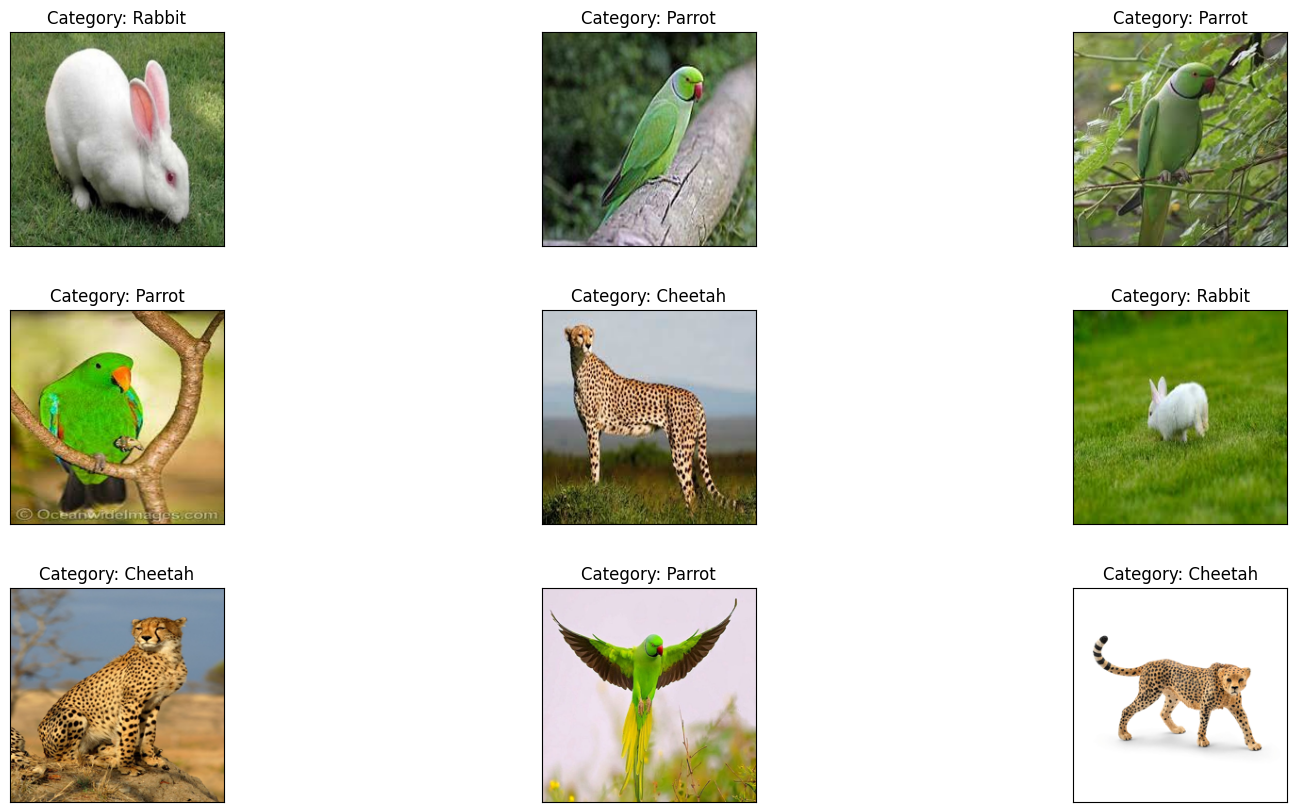

In [8]:
display_rand_images(images, labels, categories)

In [9]:
# 1-step in data shuffling

# get indices range
n = np.arange(len(labels))
print("'n' values before shuffling = ", n)

# shuffle the indices
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ", n)

# get category labels using the shuffled indices
shuffled_category_labels = [labels[i] for i in n]
print("\n'shuffled_category_labels' values after shuffling = ", shuffled_category_labels)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [10]:
# 2-step in data shuffling

# Shuffle images and labels based on shuffled indices
shuffled_images = [images[i] for i in n]
shuffled_labels = [labels[i] for i in n]

print("Images length after shuffling = ", len(shuffled_images), "\nLabels length after shuffling = ", len(shuffled_labels))

Images length after shuffling =  250 
Labels length after shuffling =  250


In [11]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (250, 227, 227, 3)


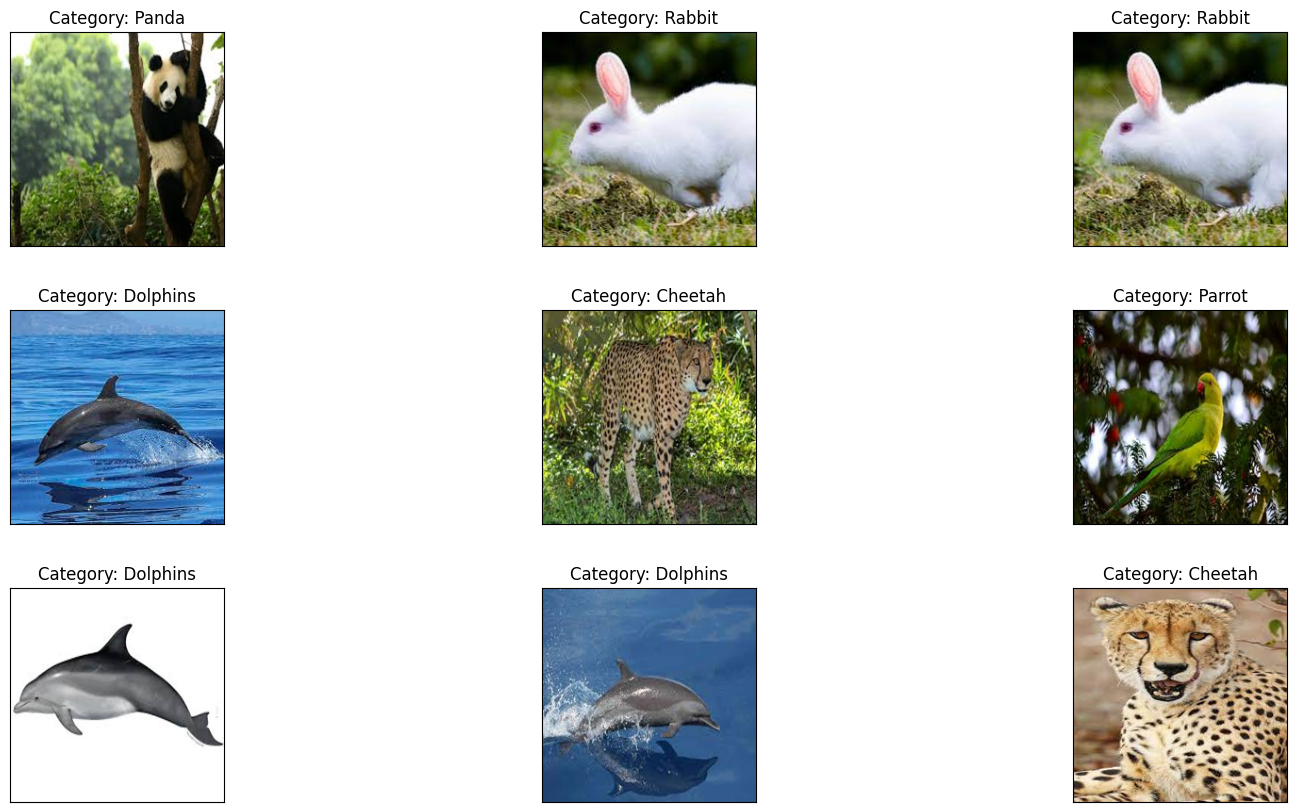

In [12]:
display_rand_images(images, labels, categories)

In [13]:
# Rearrange images and labels based on shuffled indices
shuffled_images = [images[i] for i in n]
shuffled_labels = [labels[i] for i in n]

from sklearn.model_selection import train_test_split

# Split the shuffled data into training and (validation + test) sets
x_train, x_val_test, y_train, y_val_test = train_test_split(shuffled_images, shuffled_labels, test_size=0.2, random_state=random_seed)

# Further split the (validation + test) set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=random_seed)

# Convert numerical labels in y_train, y_val, and y_test to category names
y_train_categories = [categories[label] for label in y_train]
y_val_categories = [categories[label] for label in y_val]
y_test_categories = [categories[label] for label in y_test]

print("Train set: x_train length =", len(x_train), ", y_train length =", len(y_train_categories))
print("Validation set: x_val length =", len(x_val), ", y_val length =", len(y_val_categories))
print("Test set: x_test length =", len(x_test), ", y_test length =", len(y_test_categories))

Train set: x_train length = 200 , y_train length = 200
Validation set: x_val length = 25 , y_val length = 25
Test set: x_test length = 25 , y_test length = 25


In [14]:
from keras.utils import to_categorical

In [15]:
category_to_index = {category: i for i, category in enumerate(categories)}
index_to_category = {i: category for category, i in category_to_index.items()}

# Convert category labels to numeric indices
y_train_indices = np.array([category_to_index[category] for category in y_train_categories])
y_test_indices = np.array([category_to_index[category] for category in y_test_categories])
y_val_indices = np.array([category_to_index[category] for category in y_val_categories])

# Convert class vectors to binary class matrices (one-hot encoding)
y_train_one_hot = to_categorical(y_train_indices, num_classes=len(categories))
y_test_one_hot = to_categorical(y_test_indices, num_classes=len(categories))
y_val_one_hot = to_categorical(y_val_indices, num_classes=len(categories))

## Alex Net Model

Alexnet won the Imagenet large-scale visual recognition challenge in 2012. The model was proposed in 2012 in the research paper named Imagenet Classification with Deep Convolution Neural Network by Alex Krizhevsky and his colleagues.


**Introduction**:

Alexnet won the Imagenet large-scale visual recognition challenge in 2012. The model was proposed in 2012 in the research paper named Imagenet Classification with Deep Convolution Neural Network by Alex Krizhevsky and his colleagues.


**The Architecture of Alexnet**

The Alexnet has eight layers with learnable parameters. The model consists of five layers with a combination of max pooling followed by 3 fully connected layers and they use Relu activation in each of these layers except the output layer.

They found out that using the relu as an activation function accelerated the speed of the training process by almost six times. They also used the dropout layers, that prevented their model from overfitting. Further, the model is trained on the Imagenet dataset. The Imagenet dataset has almost 14 million images across a thousand classes.

To Summarize
- It has 8 layers with learnable parameters.
- The input to the Model is RGB images.
- It has 5 convolution layers with a combination of max-pooling layers.
- Then it has 3 fully connected layers.
- The activation function used in all layers is Relu.
- It used two Dropout layers.
- The activation function used in the output layer is Softmax.
- The total number of parameters in this architecture is 62.3 million.

<img src= "https://pub.mdpi-res.com/remotesensing/remotesensing-09-00848/article_deploy/html/images/remotesensing-09-00848-g001.png?1569499335" width=600 height=300/>

In [16]:
alexnet_model=Sequential()

#1 conv layer
alexnet_model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
alexnet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexnet_model.add(BatchNormalization())

#2 conv layer
alexnet_model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
alexnet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexnet_model.add(BatchNormalization())

#3 conv layer
alexnet_model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
alexnet_model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
alexnet_model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
alexnet_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexnet_model.add(BatchNormalization())


alexnet_model.add(Flatten())

#1 dense layer
alexnet_model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

alexnet_model.add(Dropout(0.4))

alexnet_model.add(BatchNormalization())

#2 dense layer
alexnet_model.add(Dense(4096,activation="relu"))

alexnet_model.add(Dropout(0.4))

alexnet_model.add(BatchNormalization())

#3 dense layer
alexnet_model.add(Dense(1000,activation="relu"))

alexnet_model.add(Dropout(0.4))

alexnet_model.add(BatchNormalization())

#output layer
alexnet_model.add(Dense(len(categories), activation="softmax"))

alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [17]:
alexnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
x_train = np.array(x_train)  # Convert x_train to a NumPy array if it's not already

# Reshape x_train into a single tensor
x_train = x_train.reshape(-1, 227, 227, 3)

# Check the shape after reshaping
print("New x_train shape:", x_train.shape)

New x_train shape: (200, 227, 227, 3)


In [24]:
x_test=np.array(x_test)
x_val=np.array(x_val)

In [30]:
%%time
alexnet_history=alexnet_model.fit(x_train, y_train_one_hot, epochs=50, validation_data=(x_val, y_val_one_hot))

Epoch 1/50
7/7 [==============================] - 23s 3s/step - loss: 0.0890 - accuracy: 0.9700 - val_loss: 9.1431 - val_accuracy: 0.2400
Epoch 2/50
7/7 [==============================] - 20s 3s/step - loss: 0.2057 - accuracy: 0.9300 - val_loss: 7.9668 - val_accuracy: 0.3200
Epoch 3/50
7/7 [==============================] - 20s 3s/step - loss: 0.0527 - accuracy: 0.9850 - val_loss: 1.4859 - val_accuracy: 0.8000
Epoch 4/50
7/7 [==============================] - 23s 3s/step - loss: 0.2243 - accuracy: 0.9450 - val_loss: 0.9377 - val_accuracy: 0.8400
Epoch 5/50
7/7 [==============================] - 20s 3s/step - loss: 0.1631 - accuracy: 0.9550 - val_loss: 1.1729 - val_accuracy: 0.8400
Epoch 6/50
7/7 [==============================] - 20s 3s/step - loss: 0.1313 - accuracy: 0.9600 - val_loss: 4.6428 - val_accuracy: 0.5200
Epoch 7/50
7/7 [==============================] - 22s 3s/step - loss: 0.1581 - accuracy: 0.9300 - val_loss: 3.1131 - val_accuracy: 0.5600
Epoch 8/50
7/7 [==================

In [31]:
pred = alexnet_model.predict(x_test)

pred.shape

1/1 [==============================] - 1s 905ms/step


(25, 5)

In [32]:
loss, accuracy = alexnet_model.evaluate(x_test, y_test_one_hot)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 1s 906ms/step - loss: 1.1303 - accuracy: 0.7600
Validation Accuracy: 76.00%


In [28]:
from keras.models import load_model

1/1 [==============================] - 1s 513ms/step


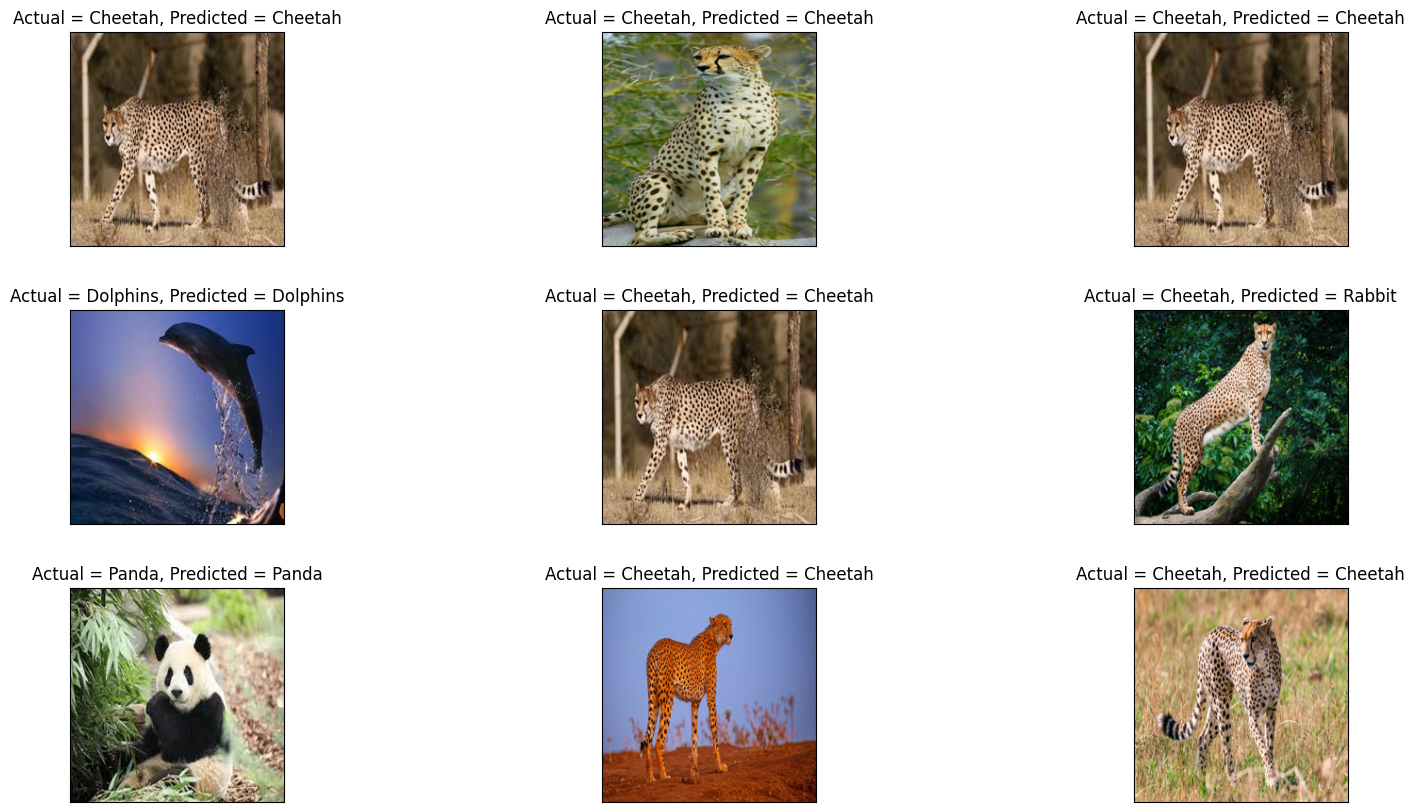

In [35]:
plt.figure(1, figsize=(19, 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint(0, x_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    plt.imshow(x_test[r[0]])

    # Assuming model predictions are available as 'model.predict(x_test)'
    pred = alexnet_model.predict(x_test)
    actual_class = np.argmax(y_test_one_hot[r[0]])  # Assuming one-hot encoded labels
    predicted_class = np.argmax(pred[r[0]])  # Predicted class index

    # Create a dictionary mapping numerical labels to category names
    category_mapping = {0: 'Cheetah', 1: 'Parrot', 2: 'Dolphins', 3: 'Rabbit', 4: 'Panda'}

    # Replace numerical labels with actual category names
    actual_category = category_mapping[actual_class]
    predicted_category = category_mapping[predicted_class]

    plt.title('Actual = {}, Predicted = {}'.format(actual_category, predicted_category))
    plt.xticks([]), plt.yticks([])

plt.show()

In [36]:
alexnet_model.save('C:/Users/Prath/OneDrive/Desktop/alex_model1.h5')

# VGG

VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. 

### VGG Architecture 

VGGNets are based on the most essential features of convolutional neural networks (CNN)
The VGG network is constructed with very small convolutional filters. The VGG-16 consists of 13 convolutional layers and three fully connected layers. Let’s take a brief look at the architecture of VGG: 

- **Input:** The VGGNet takes in an image input size of 224×224. For the ImageNet competition, the creators of the model cropped out the center 224×224 patch in each image to keep the input size of the image consistent. 

- **Convolutional Layers:** VGG’s convolutional layers leverage a minimal receptive field, i.e., 3×3, the smallest possible size that still captures up/down and left/right. Moreover, there are also 1×1 convolution filters acting as a linear transformation of the input. This is followed by a ReLU unit, which is a huge innovation from AlexNet that reduces training time. ReLU stands for rectified linear unit activation function; it is a piecewise linear function that will output the input if positive; otherwise, the output is zero. The convolution stride is fixed at 1 pixel to keep the spatial resolution preserved after convolution (stride is the number of pixel shifts over the input matrix). 

- **Hidden Layers:** All the hidden layers in the VGG network use ReLU. VGG does not usually leverage Local Response Normalization (LRN) as it increases memory consumption and training time. Moreover, it makes no improvements to overall accuracy. Fully-Connected Layers: The VGGNet has three fully connected layers. Out of the three layers, the first two have 4096 channels each, and the third has 1000 channels, 1 for each class. 

- **Fully Connected Layers:** VGG16 Architecture The number 16 in the name VGG refers to the fact that it is 16 layers deep neural network (VGGnet). This means that VGG16 is a pretty extensive network and has a total of around 138 million parameters. Even according to modern standards, it is a huge network. However, VGGNet16 architecture’s simplicity is what makes the network more appealing. Just by looking at its architecture, it can be said that it is quite uniform. There are a few convolution layers followed by a pooling layer that reduces the height and the width. If we look at the number of filters that we can use, around 64 filters are available that we can double to about 128 and then to 256 filters. In the last layers, we can use 512 filters.

<img src= "https://viso.ai/wp-content/uploads/2021/10/VGG-16-architecture-of-the-model.jpg" width=200 height=200/>

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define VGG-like model as 'vgg_model'
vgg_model = Sequential()

# Block 1
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(227, 227, 3)))
vgg_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
vgg_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
vgg_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
vgg_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
vgg_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and Dense Layers
vgg_model.add(Flatten())
vgg_model.add(Dense(4096, activation='relu'))
vgg_model.add(Dense(len(categories), activation='softmax'))  # Assuming 'categories' holds the number of output classes

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 227, 227, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 113, 113, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 256)      

In [38]:
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
%%time
vgg_history=vgg_model.fit(x_train, y_train_one_hot,batch_size=64, epochs=50,validation_data=(x_val, y_val_one_hot))

Epoch 1/50
4/4 [==============================] - 231s 50s/step - loss: 15.8969 - accuracy: 0.1400 - val_loss: 1.7010 - val_accuracy: 0.1600
Epoch 2/50
4/4 [==============================] - 221s 51s/step - loss: 1.6406 - accuracy: 0.2150 - val_loss: 1.6129 - val_accuracy: 0.1600
Epoch 3/50
4/4 [==============================] - 223s 52s/step - loss: 1.6039 - accuracy: 0.2200 - val_loss: 1.6346 - val_accuracy: 0.1600
Epoch 4/50
4/4 [==============================] - 233s 52s/step - loss: 1.5594 - accuracy: 0.2200 - val_loss: 1.8991 - val_accuracy: 0.1600
Epoch 5/50
4/4 [==============================] - 222s 52s/step - loss: 1.5224 - accuracy: 0.2200 - val_loss: 1.5697 - val_accuracy: 0.2400
Epoch 6/50
4/4 [==============================] - 228s 53s/step - loss: 1.5398 - accuracy: 0.3400 - val_loss: 1.4962 - val_accuracy: 0.2400
Epoch 7/50
4/4 [==============================] - 222s 52s/step - loss: 1.3862 - accuracy: 0.3950 - val_loss: 2.4474 - val_accuracy: 0.2400
Epoch 8/50
4/4 [===

In [40]:
vgg_model.save('C:/Users/Prath/OneDrive/Desktop/vgg_model.h5')

1/1 [==============================] - 8s 8s/step


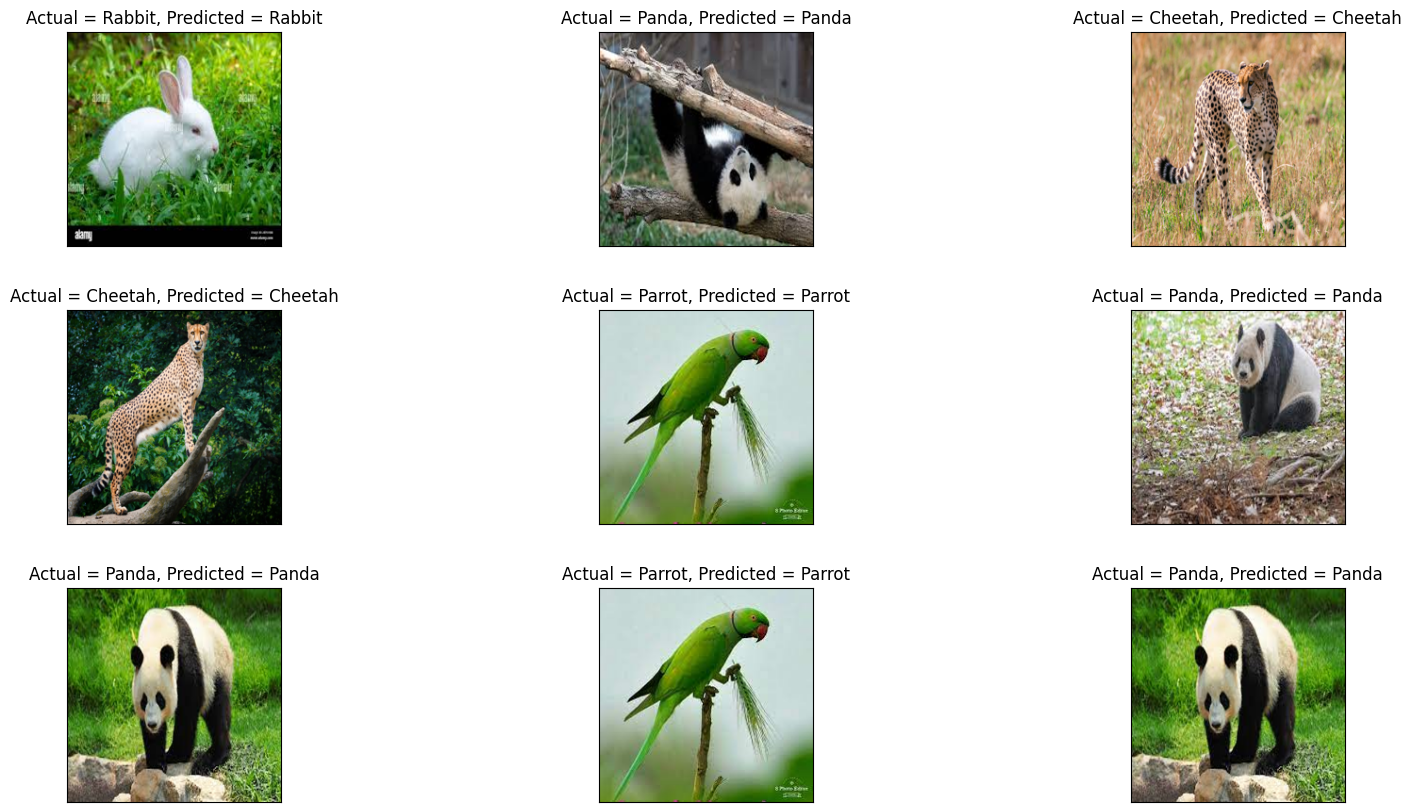

In [41]:
plt.figure(1, figsize=(19, 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint(0, x_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    plt.imshow(x_test[r[0]])

    # Assuming model predictions are available as 'model.predict(x_test)'
    pred = vgg_model.predict(x_test)
    actual_class = np.argmax(y_test_one_hot[r[0]])  # Assuming one-hot encoded labels
    predicted_class = np.argmax(pred[r[0]])  # Predicted class index

    # Create a dictionary mapping numerical labels to category names
    category_mapping = {0: 'Cheetah', 1: 'Parrot', 2: 'Dolphins', 3: 'Rabbit', 4: 'Panda'}

    # Replace numerical labels with actual category names
    actual_category = category_mapping[actual_class]
    predicted_category = category_mapping[predicted_class]

    plt.title('Actual = {}, Predicted = {}'.format(actual_category, predicted_category))
    plt.xticks([]), plt.yticks([])

plt.show()

In [43]:
from keras.utils import to_categorical

# Convert y_test to one-hot encoded format
y_test_encoded = to_categorical(y_test, num_classes=len(categories))

# Then, proceed with model evaluation using x_test and y_test_encoded
alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(x_test, y_test_encoded)

1/1 [==============================] - 2s 2s/step - loss: 1.1303 - accuracy: 0.7600


In [59]:
# Compile models before evaluation
alexnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

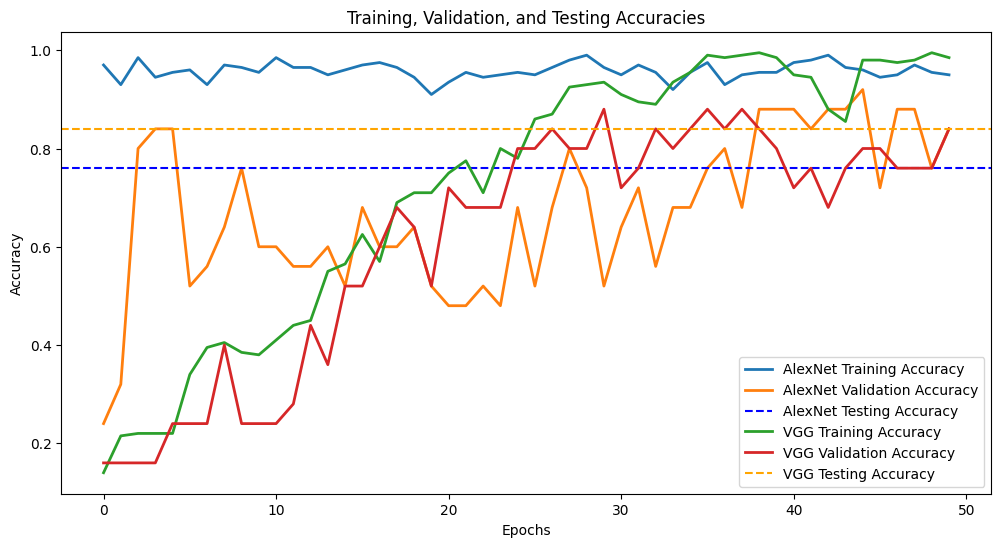

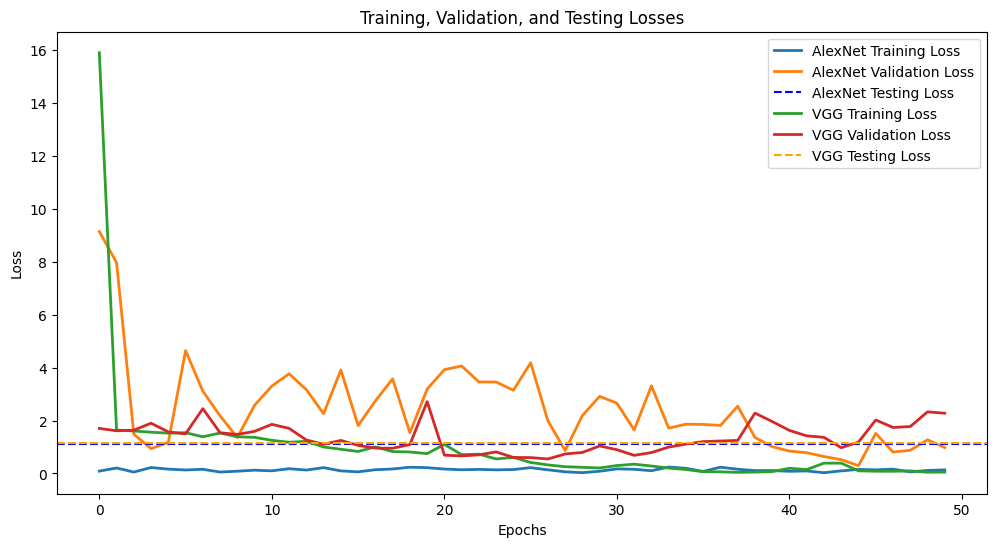

In [81]:
import matplotlib.pyplot as plt

# Assuming you have trained both AlexNet and VGG models and obtained their histories: alexnet_history, vgg_history

# Plotting Training, Validation, and Testing Accuracies
plt.figure(figsize=(12, 6))
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Training Accuracy', linestyle='-', linewidth=2)
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Validation Accuracy', linestyle='-', linewidth=2)
plt.axhline(y=alexnet_test_accuracy, color='blue', linestyle='--', label='AlexNet Testing Accuracy')
plt.plot(vgg_history.history['accuracy'], label='VGG Training Accuracy', linestyle='-', linewidth=2)
plt.plot(vgg_history.history['val_accuracy'], label='VGG Validation Accuracy', linestyle='-', linewidth=2)
plt.axhline(y=vgg_test_accuracy, color='orange', linestyle='--', label='VGG Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Testing Accuracies')
plt.legend()
plt.show()

# Plotting Training, Validation, and Testing Losses
plt.figure(figsize=(12, 6))
plt.plot(alexnet_history.history['loss'], label='AlexNet Training Loss', linestyle='-', linewidth=2)
plt.plot(alexnet_history.history['val_loss'], label='AlexNet Validation Loss', linestyle='-', linewidth=2)
plt.axhline(y=alexnet_test_loss, color='blue', linestyle='--', label='AlexNet Testing Loss')
plt.plot(vgg_history.history['loss'], label='VGG Training Loss', linestyle='-', linewidth=2)
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss', linestyle='-', linewidth=2)
plt.axhline(y=vgg_test_loss, color='orange', linestyle='--', label='VGG Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Testing Losses')
plt.legend()
plt.show()


In [73]:
alexnet_val_loss, alexnet_val_accuracy = alexnet_model.evaluate(x_val, y_val_one_hot)
vgg_val_loss, vgg_val_accuracy = vgg_model.evaluate(x_val, y_val_one_hot)

alexnet_test_loss, alexnet_test_accuracy = alexnet_model.evaluate(x_test, y_test_encoded)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(x_test, y_test_encoded)

print(f"AlexNet - Validation Accuracy: {alexnet_val_accuracy * 100:.2f}%")
print(f"AlexNet - Validation Loss: {alexnet_val_loss}")
print(f"AlexNet - Testing Accuracy: {alexnet_test_accuracy * 100:.2f}%")
print(f"AlexNet - Testing Loss: {alexnet_test_loss}")

print(f"VGG - Validation Accuracy: {vgg_val_accuracy * 100:.2f}%")
print(f"VGG - Validation Loss: {vgg_val_loss}")
print(f"VGG - Testing Accuracy: {vgg_test_accuracy * 100:.2f}%")
print(f"VGG - Testing Loss: {vgg_test_loss}")

1/1 [==============================] - 8s 8s/step - loss: 1.1420 - accuracy: 0.8400
AlexNet - Validation Accuracy: 84.00%
AlexNet - Validation Loss: 0.9766948223114014
AlexNet - Testing Accuracy: 76.00%
AlexNet - Testing Loss: 1.1302763223648071
VGG - Validation Accuracy: 84.00%
VGG - Validation Loss: 2.2755210399627686
VGG - Testing Accuracy: 84.00%
VGG - Testing Loss: 1.1419728994369507


### Model Comparison: AlexNet vs. VGG

#### Validation Metrics after 50 epochs:
- **Validation Accuracy**: AlexNet achieved an accuracy of approximately 84% while VGG achieved 84%.
- **Validation Loss**: AlexNet recorded a loss of around 0.9766, whereas VGG showed a loss of approximately 2.275.

#### Training Metrics after 50 epochs:
- **Training Accuracy**: AlexNet attained a training accuracy of roughly 95% after 50 epochs, whereas VGG achieved 98%.
- **Training Loss**: AlexNet had a training loss of around 0.1352 after 50 epochs, while VGG showed a loss of approximately 0.0517.

#### Testing Metrics:
- **Testing Accuracy**: AlexNet demonstrated an accuracy of roughly 76% on the test set, whereas VGG achieved 84% accuracy.
- **Testing Loss**: AlexNet recorded a loss of around 1.13 on the test set, while VGG showed a loss of approximately 1.14.

These comparisons give us a clear understanding of how AlexNet and VGG performed concerning accuracy and loss on both the validation and testing sets after training for a minimum of 50 epochs on the provided dataset.

### Conclusion: 

The study seeks to draw conclusive observations regarding the relative performance, strengths, and potential limitations of AlexNet and VGG models when applied to a specific dataset containing distinct categories, thereby contributing to a deeper understanding of their applicability in image classification tasks.